#### Decision Ratio
We will create this Decision Ratio based on the success rates of 2PA vs. XPA to help assess the trade-off and make more informed decisions. The ratio will show us how often a 2-point conversion is chosen based on its relative success compared to an extra point.

In [2]:
%pip install numpy matplotlib seaborn

In [8]:
# Importing packages that I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clean_data.csv')
print(df.head(33))

                       Tm  2PM  2PA   XPM   XPA     2PPerc      XPPerc
0       Arizona Cardinals    7   17    50    51  41.176471   98.039216
1         Atlanta Falcons    4    8    53    54  50.000000   98.148148
2        Baltimore Ravens    3    5    98   101  60.000000   97.029703
3           Buffalo Bills    4    5    99   104  80.000000   95.192308
4       Carolina Panthers    4    6    40    44  66.666667   90.909091
5           Chicago Bears    4   14    51    54  28.571429   94.444444
6      Cincinnati Bengals    2    4    84    86  50.000000   97.674419
7        Cleveland Browns   11   17    47    52  64.705882   90.384615
8          Dallas Cowboys    5    8    75    78  62.500000   96.153846
9          Denver Broncos    4    8    64    66  50.000000   96.969697
10          Detroit Lions    3    7   102   107  42.857143   95.327103
11      Green Bay Packers    4    9    73    78  44.444444   93.589744
12         Houston Texans    2    9    62    64  22.222222   96.875000
13    

In [12]:
league_2PP = (df.loc[df['Tm'] == 'League', '2PM'].values[0] / df.loc[df['Tm'] == 'League', '2PA'].values[0])
league_XPP = (df.loc[df['Tm'] == 'League', 'XPM'].values[0] / df.loc[df['Tm'] == 'League', 'XPA'].values[0])


decision_ratio = league_2PP / league_XPP
print(f'Basic Decision Ratio: {decision_ratio:.2f}')

adjusted_decision_ratio = (league_2PP * 2) / (league_XPP * 1)
print(f'Adjusted Decision Ratio: {adjusted_decision_ratio:.2f}')

Basic Decision Ratio: 0.49
Adjusted Decision Ratio: 0.99


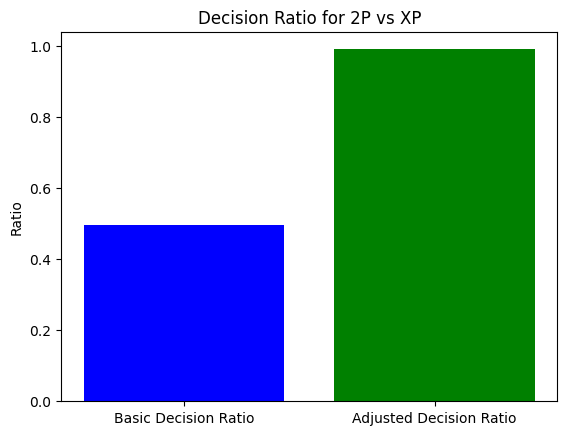

In [13]:
# Data
ratios = [decision_ratio, adjusted_decision_ratio]
labels = ['Basic Decision Ratio', 'Adjusted Decision Ratio']

# Plot
plt.bar(labels, ratios, color=['blue', 'green'])
plt.title('Decision Ratio for 2P vs XP')
plt.ylabel('Ratio')
plt.show()

#### Conclusion
We quantify the relative success of 2-point conversions vs. extra points by calculating the decision ratio. This ratio will give us a more intuitive way to compare the two options based on their success rates and the points they contribute to a team's score. Adjusting the ratio to account for the different point values accurately reflects the decision-making process.

Despite the Adjusted Decision Ratio being close to 1, the large difference in the raw number of attempts indicates that teams choose to kick XP far more frequently than attempting 2-point conversions. The fact that teams are attempting 2176 extra points compared to only 242 2-point conversions strongly suggests that teams are choosing to kick the extra point far too often, potentially when a 2-point conversion could be a more advantageous option. The Adjusted Decision Ratio may not fully capture this disparity, as it focuses more on success rates, whereas the raw attempt data indicates a clear preference for extra points. This imbalance may imply that teams are overly conservative or relying on the safer, more successful option (XP), even when a 2-point conversion might be a better strategic choice.